In [1]:
#Code retreived from https://medium.datadriveninvestor.com/sentiment-analysis-of-stocks-from-financial-news-using-python-82ebdcefb638
#By Damian Boh.
# Date : May 6, 2020



# Import libraries
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# NLTK VADER for sentiment analysis
import nltk
#nltk.downloader.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
finwiz_url = 'https://finviz.com/quote.ashx?t='
news_tables = {}
tickers = ['AAPL', 'BAC', 'BCS', 'JPM', 'TSLA','NVDA']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64; rv:20.0) Gecko/20100101 Firefox/20.0'}) 
    response = urlopen(req)    
    # Read the contents of the file into 'html'
    html = BeautifulSoup(response)
    # Find 'news-table' in the Soup and load it into 'news_table'
    news_table = html.find(id='news-table')
    # Add the table to our dictionary
    news_tables[ticker] = news_table

In [3]:
# Read one single day of headlines for ‘AMZN’ 
# not mandatory. For explanation purposes
amzn = news_tables['TSLA']
# Get all the table rows tagged in HTML with <tr> into ‘amzn_tr’
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
 # Read the text of the element ‘a’ into ‘link_text’
    a_text = table_row.a.text
 # Read the text of the element ‘td’ into ‘data_text’
    td_text = table_row.td.text
 # Print the contents of ‘link_text’ and ‘data_text’ 
    print(a_text)
    print(td_text)
 # Exit after printing 4 rows of data
    if i == 3:
        break

Is Li Auto Stock A Buy After August Delivery Report?
Sep-07-22 01:02PM  
Struggling EV Startups Wont Get a Tesla Rebound
11:08AM  
Elon Musk $258 billion Dogecoin lawsuit expands
11:06AM  
Tesla, PG&E and 3 More Stocks to Track in Californias Power Crisis
10:39AM  


In [4]:
parsed_news = []
# Iterate through the news
for file_name, news_table in news_tables.items():
    # Iterate through all tr tags in 'news_table'
    for x in news_table.findAll('tr'):
        # read the text from each tr tag into text get text from a only
        text = x.a.get_text() 
        # splite text in the td tag into a list 
        date_scrape = x.td.text.split()
        # if the length of 'date_scrape' is 1, load 'time' as the only element
        if len(date_scrape) == 1:
            time = date_scrape[0]
        else:# else load 'date' as the 1st element and 'time' as the second  
            date = date_scrape[0]
            time = date_scrape[1]
        # Extract the ticker from the file name, get the string up to the 1st '_'  
        ticker = file_name.split('_')[0]
        
        # Append ticker, date, time and headline as a list to the 'parsed_news' list
        parsed_news.append([ticker, date, time, text])
        
parsed_news[:5] # print first 5 rows of news

[['AAPL',
  'Sep-07-22',
  '01:38PM',
  "iPhone 14 release live: Apple Watch Ultra revealed at 'Far Out' event"],
 ['AAPL',
  'Sep-07-22',
  '01:29PM',
  'UPDATE 1-Apple unveils new Watches, iPhone upgrades expected'],
 ['AAPL',
  'Sep-07-22',
  '01:29PM',
  'Apple event - live: iPhone 14, new AirPods and Watch to be unveiled on global stream'],
 ['AAPL',
  'Sep-07-22',
  '01:29PM',
  'Apple debuts Apple Watch Series 8 starting at $399'],
 ['AAPL',
  'Sep-07-22',
  '01:28PM',
  'Apples iPhone Event Is Underway. What to Watch.']]

# **Explaining the columns of our dataset**
The first 5 rows of the DataFrame from the code above should look something like this. The ‘compound’ column gives the sentiment scores. For positive scores, the higher the value, the more positive the sentiment is. Similarly for negative scores, the more negative the value, the more negative the sentiment is. The scores range from -1 to 1.

In [5]:
# Instantiate the sentiment intensity analyzer
vader = SentimentIntensityAnalyzer()

# Set column names
columns = ['ticker', 'date', 'time', 'headline']

# Convert the parsed_news list into a DataFrame called 'parsed_and_scored_news'
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)

# Iterate through the headlines and get the polarity scores using vader
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()

# Convert the 'scores' list of dicts into a DataFrame
scores_df = pd.DataFrame(scores)

# Join the DataFrames of the news and the list of dicts
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')

# Convert the date column from string to datetime
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date

#Store the sentiment scores in a file
parsed_and_scored_news.to_csv('SA_dataset.csv', index=False)

#parsed_and_scored_news.head()
print(parsed_and_scored_news)


    ticker        date     time  \
0     AAPL  2022-09-07  01:38PM   
1     AAPL  2022-09-07  01:29PM   
2     AAPL  2022-09-07  01:29PM   
3     AAPL  2022-09-07  01:29PM   
4     AAPL  2022-09-07  01:28PM   
..     ...         ...      ...   
595   NVDA  2022-09-01  10:43AM   
596   NVDA  2022-09-01  10:15AM   
597   NVDA  2022-09-01  10:00AM   
598   NVDA  2022-09-01  09:48AM   
599   NVDA  2022-09-01  09:33AM   

                                              headline    neg    neu    pos  \
0    iPhone 14 release live: Apple Watch Ultra reve...  0.000  1.000  0.000   
1    UPDATE 1-Apple unveils new Watches, iPhone upg...  0.000  1.000  0.000   
2    Apple event - live: iPhone 14, new AirPods and...  0.000  1.000  0.000   
3    Apple debuts Apple Watch Series 8 starting at ...  0.000  1.000  0.000   
4      Apples iPhone Event Is Underway. What to Watch.  0.000  1.000  0.000   
..                                                 ...    ...    ...    ...   
595  Nvidia and AMD Stock 

# **Plot a Bar Chart of the Sentiment Score for Each Day**

The following code takes the average of the sentiment scores for all news headlines collected during each date and plots it on a bar chart. You can average the scores for each week too, to obtain the overall sentiment for a week.

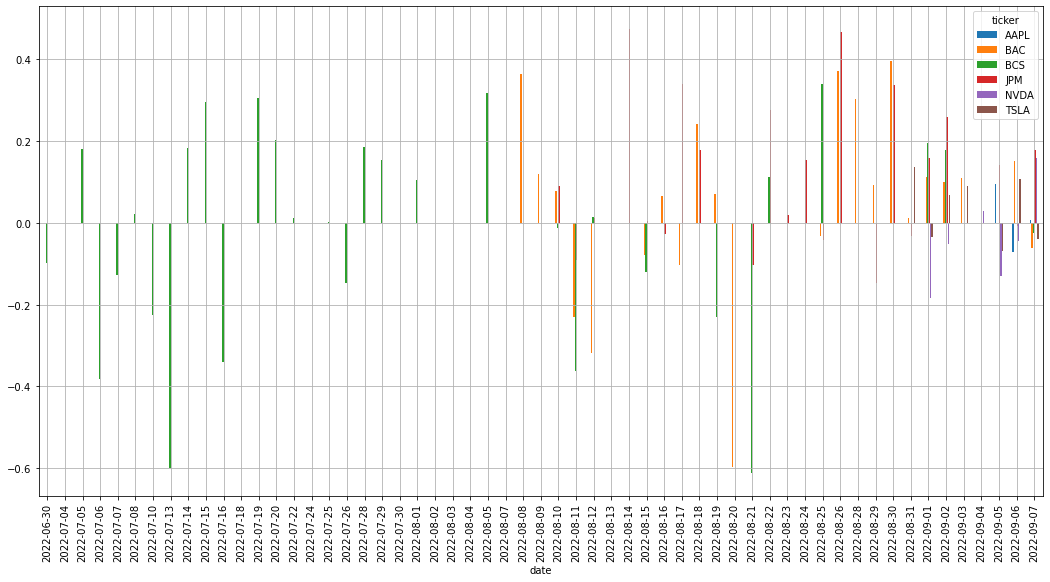

In [7]:
plt.rcParams['figure.figsize'] = [18, 9]

# Group by date and ticker columns from scored_news and calculate the mean
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()

# Unstack the column ticker
mean_scores = mean_scores.unstack()

# Get the cross-section of compound in the 'columns' axis
mean_scores = mean_scores.xs('compound', axis="columns").transpose()

# Plot a bar chart with pandas
mean_scores.plot(kind = 'bar')
plt.grid()

mean_scores.to_csv('SA_dataset2.csv', index=True)